In [1]:
#Business Problem
#Employee attrition(why employees leave) and its main factors (KPIs affecting them to leave)


#df[df['BusinessTravel'].str.startswith("T")]



# Select names starting with "A"
#employees_starting_with_a = df[df['EmployeeName'].str.startswith('A')]


In [2]:
#Objectives
#To study and apply the various methods to identify and treat the null values existing a dataset
#To study and apply the various methods to identify and treat the outlier values if any exists in the dataset
#To use different libraries for data analysis
#To conduct an exploratory data analysis of the survey responses
#To understand the major influencers of stress
#To visualise and gain insights from the dataset

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [5]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("C:/Users/Ayush/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")#Reading the dataset
df.head(2)

#"C:\Users\ayush\\WA_Fn-UseC_-HR-Employee-Attrition.csv"

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [6]:
df.shape# The data has 15972 rows and 24 columns

(1470, 35)

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5


In [7]:
#df['GENDER'] = df['GENDER'].map({'Female':0, 'Male':1})
#df['AGE'] = df['AGE'].map({'Less than 20':0, '21 to 35':1, '36 to 50':2, '51 or more':3})
#df

In [8]:
#df=df.drop(['Timestamp'], axis=1)#dropping unnecessary columns
#df

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

In [10]:
def categorize_age_group(age):
    if 18 <= age <= 25:
        return 'Freshers'
    elif 26 <= age <= 30:
        return 'Juniors'
    elif 31 <= age <= 40:
        return 'Mid Seniors'
    elif age >= 41:
        return 'Seniors'
    else:
        return 'Unknown'

# Apply the function to create a new column 'AgeGroup'
df['AgeGroup'] = df['Age'].apply(categorize_age_group)

In [12]:
df["Department"].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [13]:
def Dept(Department):
    if Department=="Research & Development":
        return "a"
    elif Department=="Sales":
        return "b"
    else:
        return "c"
df["Dept_id"]= df["Department"].apply(Dept)
    


In [14]:
df["Dept_id"]

0       b
1       a
2       a
3       a
4       a
       ..
1465    a
1466    a
1467    a
1468    b
1469    a
Name: Dept_id, Length: 1470, dtype: object

In [15]:
df=df.drop("Dept_id", axis=1)

In [16]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Seniors
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Mid Seniors
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Mid Seniors
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Juniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Mid Seniors
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Mid Seniors
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Juniors
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Seniors


In [16]:
age_groups_categ_sum = df.groupby('AgeGroup').sum()

# Display the result
age_groups_categ_sum

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
AgeGroup,,,,,,,,,,,,,,,,,,,,,
Freshers,2756,NoNoNoYesNoNoYesYesNoNoNoYesNoNoNoNoYesYesNoNo...,Non-TravelNon-TravelTravel_RarelyTravel_Rarely...,95081,Research & DevelopmentResearch & DevelopmentRe...,1140,249,MedicalOtherLife SciencesMedicalTechnical Degr...,123,121610,...,332,9840,72,385,358,350,305,193,90,184
Juniors,7426,NoNoNoYesNoNoNoYesNoNoYesNoNoNoNoNoNoNoNoNoNoN...,Travel_RarelyTravel_RarelyTravel_RarelyTravel_...,221487,Research & DevelopmentResearch & DevelopmentRe...,2511,706,MedicalLife SciencesLife SciencesLife Sciences...,263,266986,...,696,21040,228,1733,744,702,1406,946,350,943
Mid Seniors,21809,YesNoNoNoNoNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoN...,Travel_RarelyTravel_FrequentlyTravel_Frequentl...,488189,Research & DevelopmentResearch & DevelopmentRe...,5531,1897,OtherLife SciencesLife SciencesLife SciencesMe...,619,648996,...,1662,49520,498,6226,1711,1725,4322,2765,1415,2706
Seniors,22287,YesNoNoNoNoNoNoNoNoNoYesYesNoYesNoNoNoNoNoNoNo...,Travel_RarelyTravel_FrequentlyTravel_RarelyTra...,374897,SalesResearch & DevelopmentResearch & Developm...,4331,1430,Life SciencesLife SciencesMedicalLife Sciences...,465,468960,...,1297,37200,369,8237,1302,1282,4269,2313,1361,2228


In [17]:
df['AgeGroup'].value_counts()

AgeGroup
Mid Seniors    619
Seniors        465
Juniors        263
Freshers       123
Name: count, dtype: int64

In [18]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [19]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [20]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [21]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [22]:
# Removing duplicate rows.
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
df.duplicated().sum()

0

In [24]:
#checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [25]:
#to see the distribution of data
#plt.figure(figsize=(10,4))
#sns.distplot(df['FRUITS_VEGGIES'], hist=True, rug=False).set_yticks([])
#sns.despine(bottom=False, left=True)

In [26]:
#target KPI (Predictor)
df['Attrition'].describe()

count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object

In [27]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

In [28]:
df['HourlyRate'].mean()

65.89115646258503

In [29]:
#recommended choice when the distribution of the values of a given feature is skewed.

In [30]:
#df['FRUITS_VEGGIES'] = df['FRUITS_VEGGIES'].fillna(df['FRUITS_VEGGIES'].median())

In [31]:
#df['FRUITS_VEGGIES'].isnull().sum()

In [32]:
#plt.figure(figsize=(10,4))
#sns.distplot(df['DAILY_STRESS'], hist=True, rug=False, color="y").set_yticks([])
#sns.despine(bottom=False, left=True)

In [33]:
#df['DAILY_STRESS'].describe()
#The max value seems to be normal when compared to the mean and median values. 

In [34]:
#df['DAILY_STRESS'].isnull().sum()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [36]:
# Make a heatmap
#sns.heatmap(df.corr())

In [37]:
#plt.boxplot(df, labels=["python"],showmeans=True, sym="+g")

<Axes: >

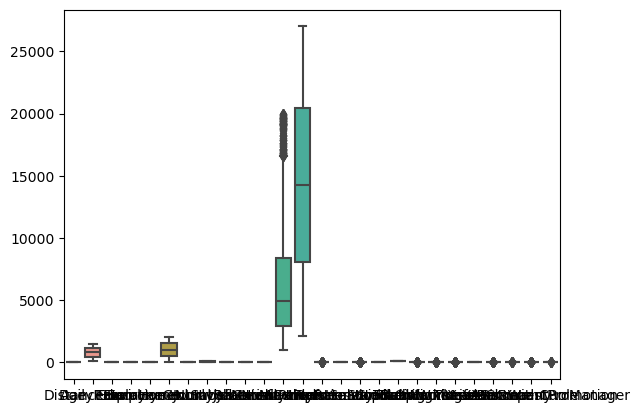

In [38]:
sns.boxplot(data=df)

In [39]:
selected_columns1=["TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion"]

In [40]:
selected_columns1

['TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion']

In [41]:
selected_columns1 = df[selected_columns1]
       

In [42]:
selected_columns1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   TotalWorkingYears        1470 non-null   int64
 1   TrainingTimesLastYear    1470 non-null   int64
 2   YearsAtCompany           1470 non-null   int64
 3   YearsInCurrentRole       1470 non-null   int64
 4   YearsSinceLastPromotion  1470 non-null   int64
dtypes: int64(5)
memory usage: 57.6 KB


<Axes: >

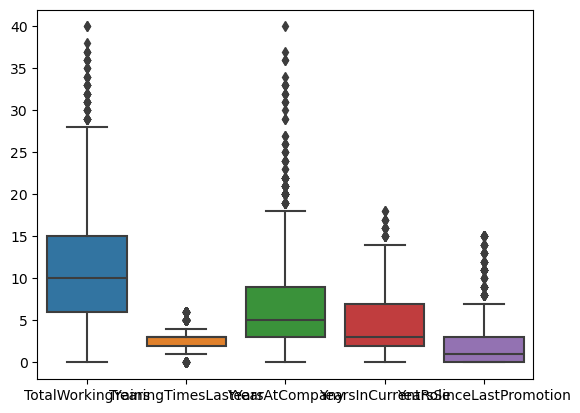

In [43]:
sns.boxplot(data=selected_columns1)

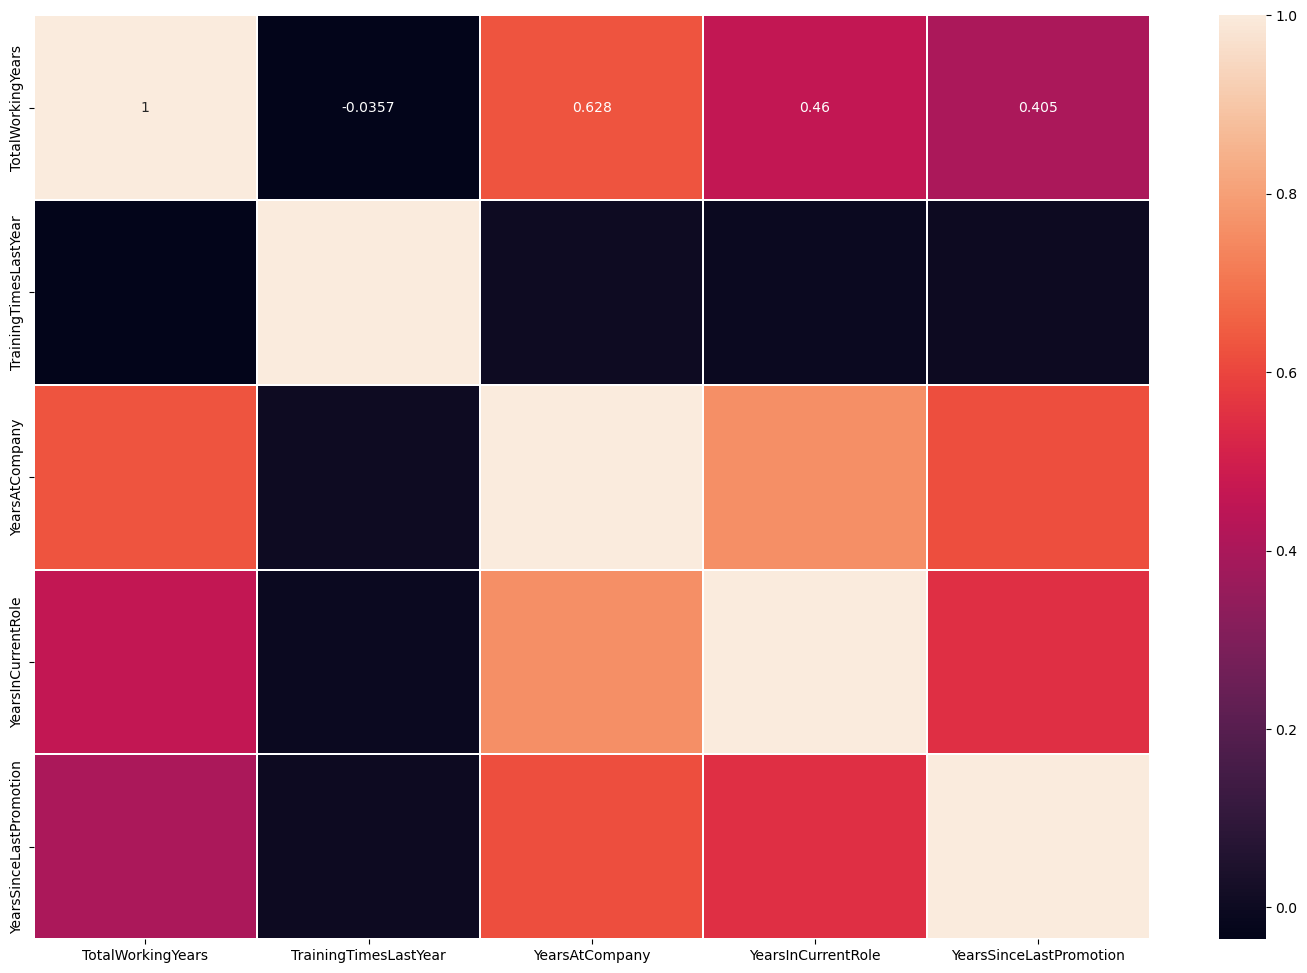

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame contains numerical columns for correlation
corr = selected_columns1.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.3g', linewidths=1.2)
plt.show()  

<Axes: ylabel='count'>

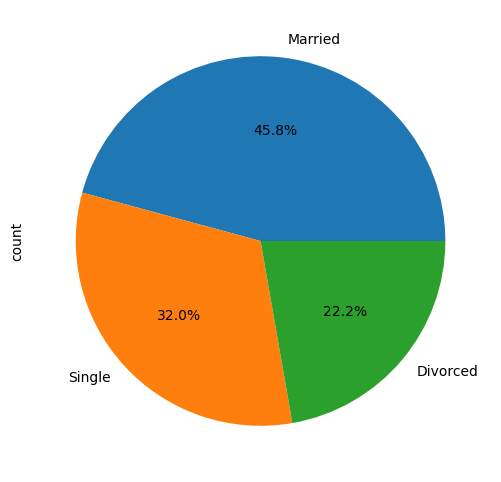

In [45]:

df['MaritalStatus'].value_counts().plot(kind='pie',  autopct='%1.1f%%', figsize=(6,6))




<Axes: ylabel='count'>

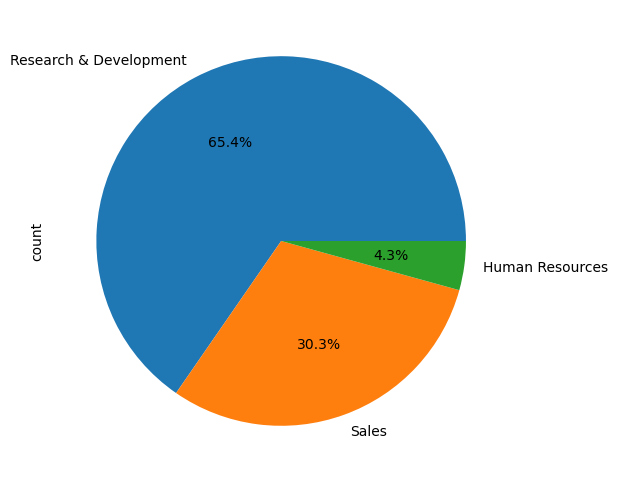

In [46]:
df['Department'].value_counts().plot(kind='pie',  autopct='%1.1f%%', figsize=(6,6))


<Axes: ylabel='count'>

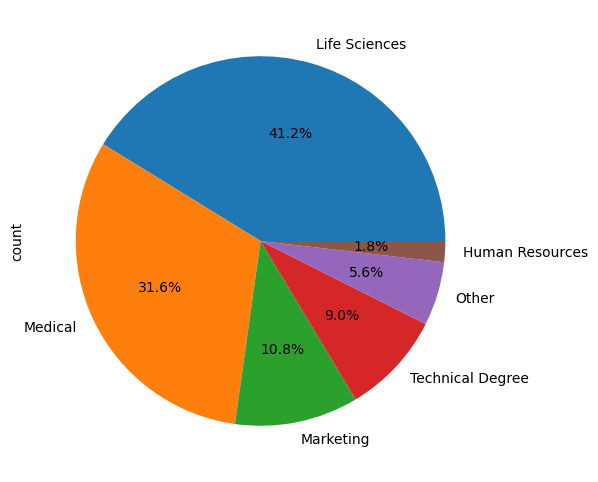

In [47]:
df['EducationField'].value_counts().plot(kind='pie',  autopct='%1.1f%%', figsize=(6,6))


<Axes: ylabel='count'>

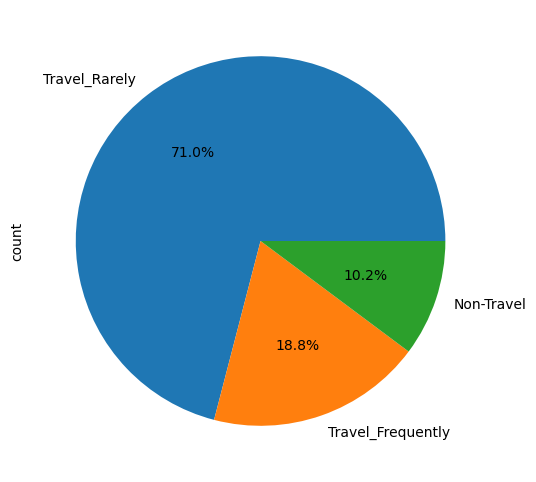

In [48]:
df['BusinessTravel'].value_counts().plot(kind='pie',  autopct='%1.1f%%', figsize=(6,6))

In [49]:
sum_income_by_marital_status=df.groupby("MaritalStatus")["Income"].sum()
sum_income_by_marital_status

KeyError: 'Column not found: Income'

In [ ]:
df.info()

In [ ]:
df['EducationField'].value_counts()

In [50]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

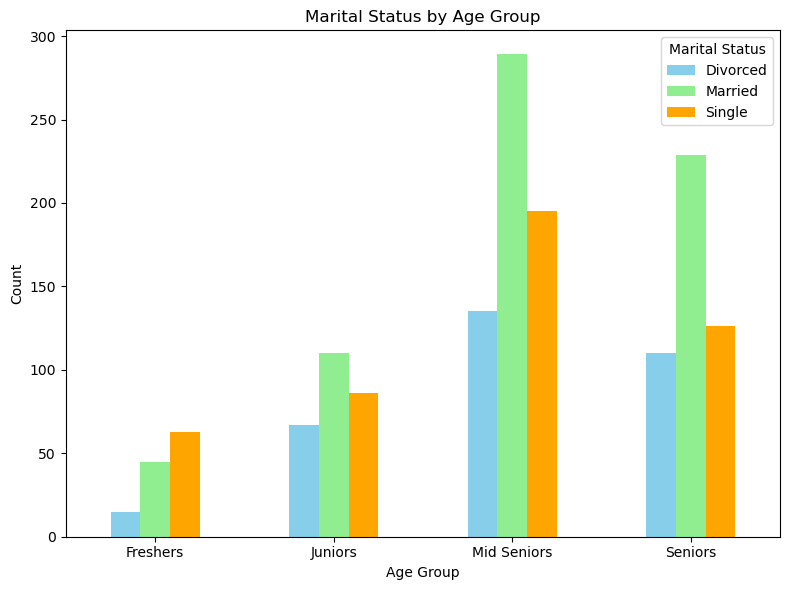

In [51]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a cross-tabulation of MaritalStatus and AgeGroup
ct = pd.crosstab(df['AgeGroup'], df['MaritalStatus'])

# Plot a grouped bar chart
ct.plot(kind='bar', figsize=(8,6), color=['skyblue', 'lightgreen', 'orange'])

# Add labels and title
plt.title('Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Make x-axis labels horizontal

# Display the plot
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

In [52]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Seniors


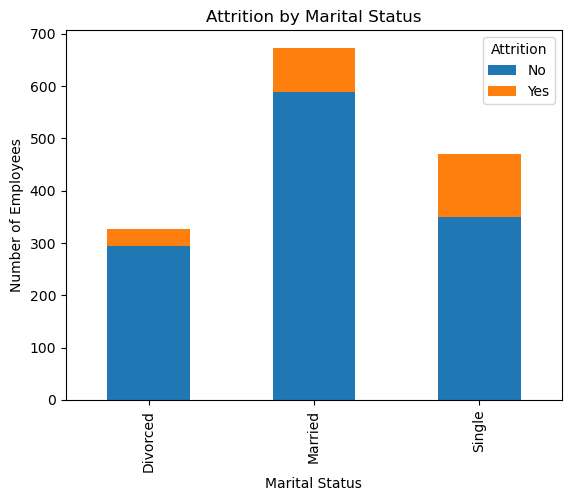

In [53]:
attrition_counts = pd.crosstab(df['MaritalStatus'], df['Attrition'])

attrition_counts.plot(kind='bar', stacked=True)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

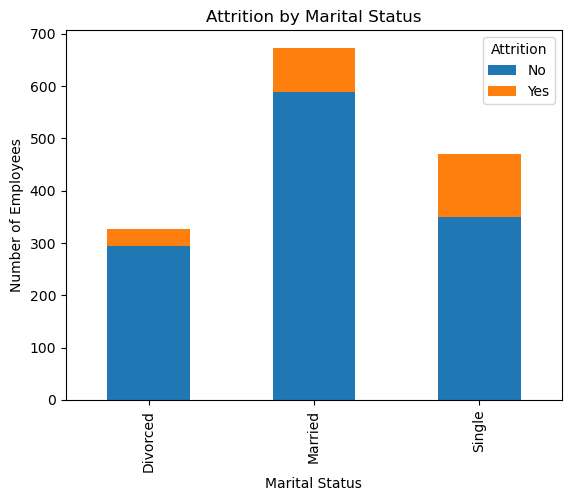

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame with 'MaritalStatus' and 'Attrition' columns
attrition_counts = pd.crosstab(df['MaritalStatus'], df['Attrition'])

attrition_counts.plot(kind='bar', stacked=True)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

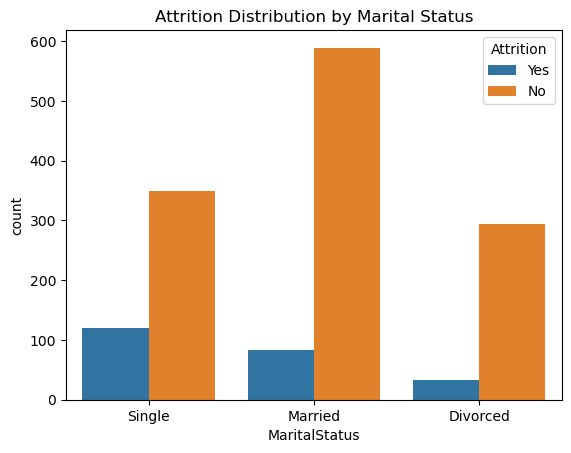

In [55]:
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition Distribution by Marital Status')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

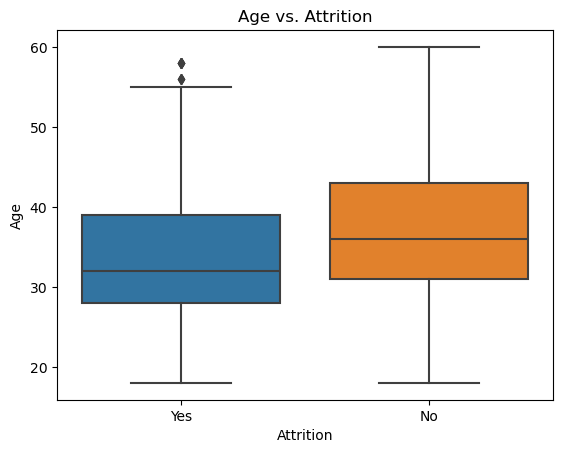

In [57]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs. Attrition')
plt.show()

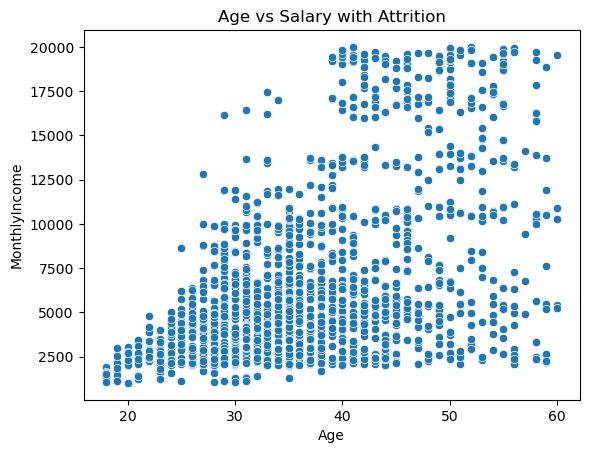

In [58]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)
plt.title('Age vs Salary with Attrition')
plt.show()

## ROC Curve (After Model): After applying logistic regression, you can plot the ROC curve to evaluate the performance of the model. The ROC curve helps assess the tradeoff between the true positive rate (TPR) and false positive rate (FPR).

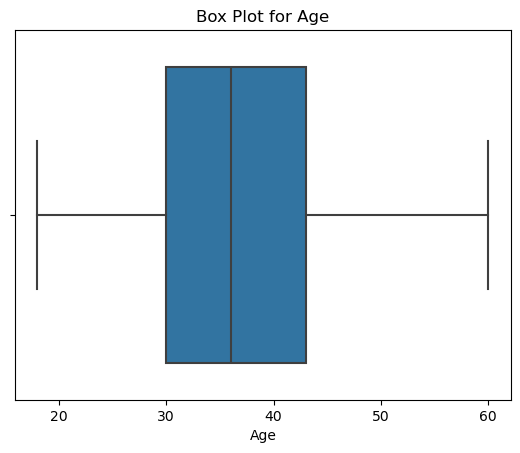

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# For example, check for outliers in the 'Age' column
sns.boxplot(x=df['Age'])
plt.title('Box Plot for Age')
plt.show()

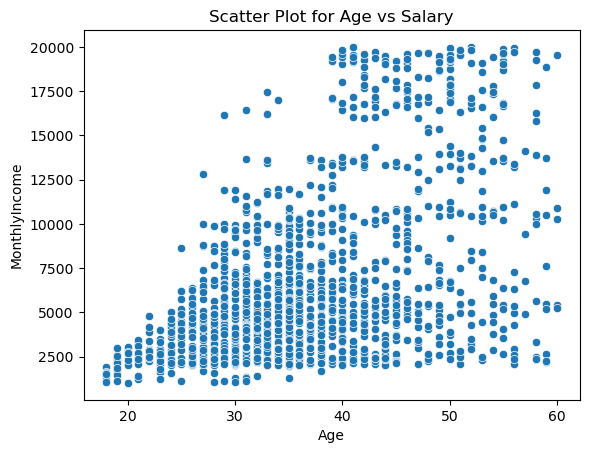

In [61]:
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)
plt.title('Scatter Plot for Age vs Salary')
plt.show()

In [62]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Seniors
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Mid Seniors
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Mid Seniors
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Juniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Mid Seniors
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Mid Seniors
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Juniors
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Seniors


In [63]:
df[df['BusinessTravel'].str.startswith("T")]
# Select names starting with "A"
#employees_starting_with_a = df[df['EmployeeName'].str.startswith('A')]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Seniors
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Mid Seniors
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Mid Seniors
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Juniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Mid Seniors
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Mid Seniors
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Juniors
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Seniors


In [65]:
#employee_names = df[df['EmployeeName'].str.endswith('A')]['EmployeeName']


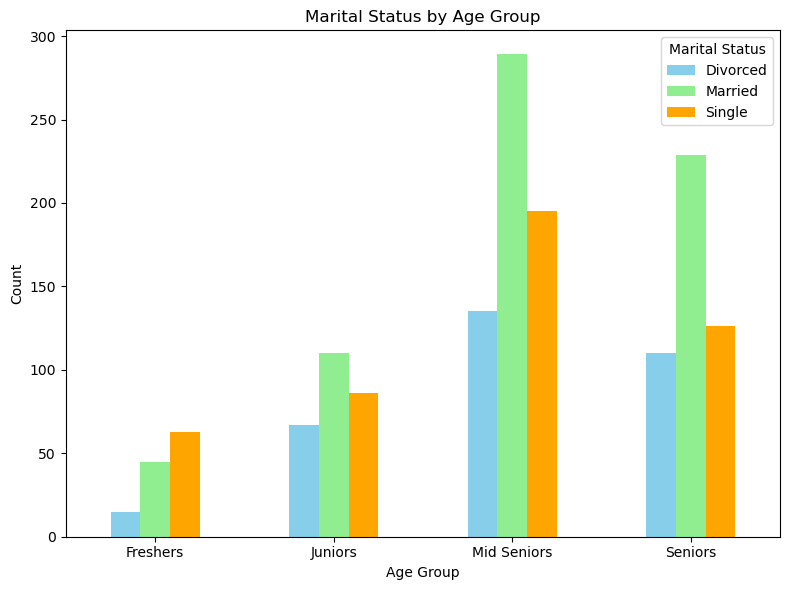

In [66]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a cross-tabulation of MaritalStatus and AgeGroup
ct = pd.crosstab(df['AgeGroup'], df['MaritalStatus'])

# Plot a grouped bar chart
ct.plot(kind='bar', figsize=(8,6), color=['skyblue', 'lightgreen', 'orange'])

# Add labels and title
plt.title('Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Make x-axis labels horizontal

# Display the plot
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

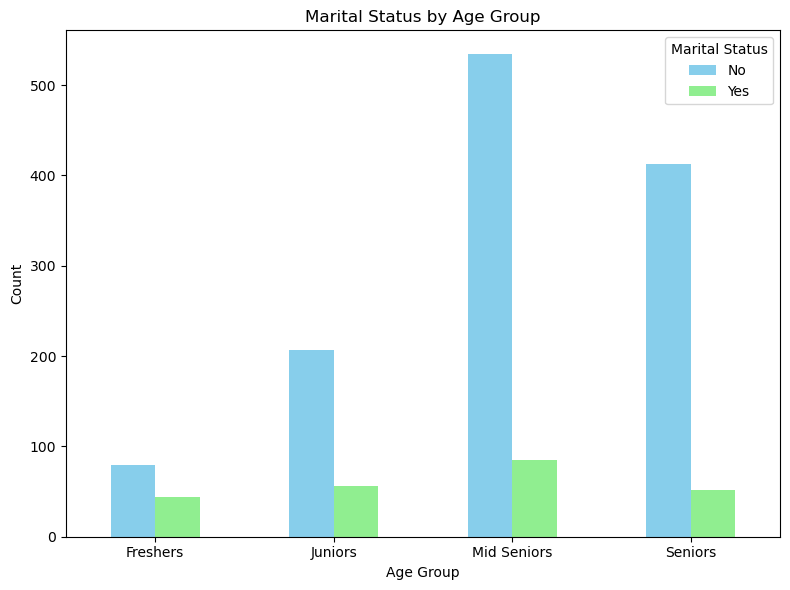

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a cross-tabulation of MaritalStatus and AgeGroup
ct = pd.crosstab(df['AgeGroup'], df['Attrition'])

# Plot a grouped bar chart
ct.plot(kind='bar', figsize=(8,6), color=['skyblue', 'lightgreen', 'orange'])

# Add labels and title
plt.title('Marital Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Make x-axis labels horizontal

# Display the plot
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

In [68]:
df['AgeGroup'].value_counts()

AgeGroup
Mid Seniors    619
Seniors        465
Juniors        263
Freshers       123
Name: count, dtype: int64

In [69]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

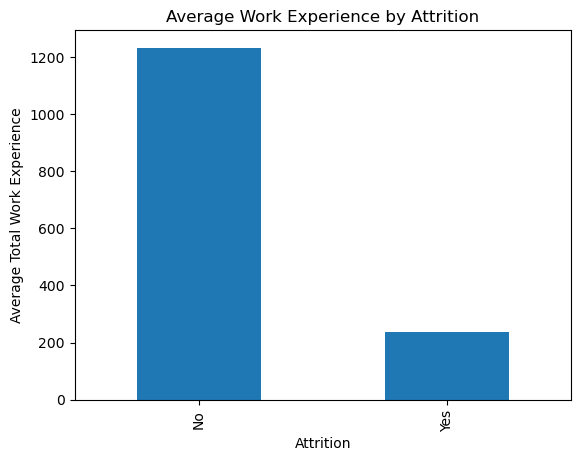

In [71]:
df.groupby('Attrition')['TotalWorkingYears'].count().plot(kind='bar')
plt.title('Average Work Experience by Attrition')
plt.ylabel('Average Total Work Experience')
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

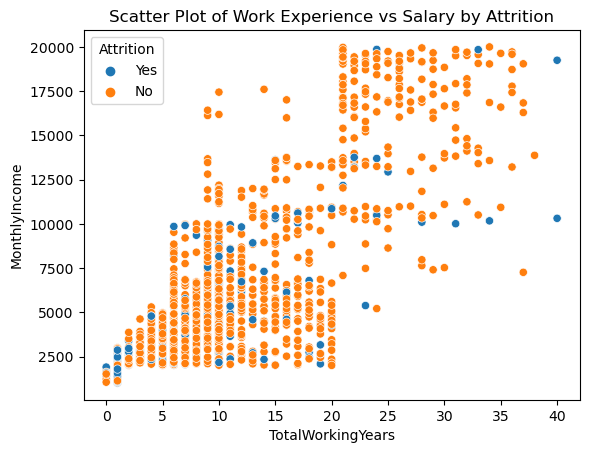

In [73]:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Scatter Plot of Work Experience vs Salary by Attrition')
plt.show()

C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayush\anacon

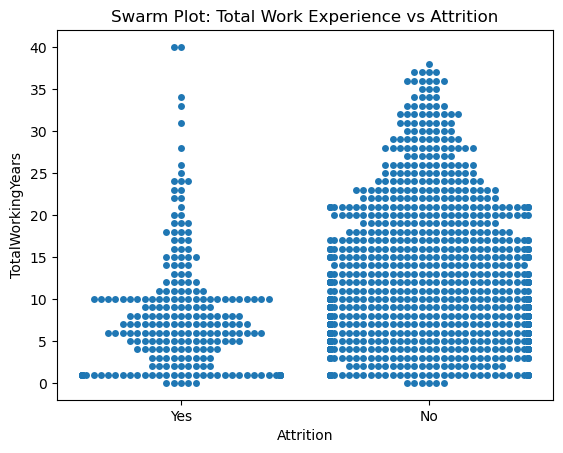

In [74]:
sns.swarmplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title('Swarm Plot: Total Work Experience vs Attrition')
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,Seniors
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Mid Seniors
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,Mid Seniors
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,Juniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,Mid Seniors
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,Mid Seniors
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,Juniors
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,Seniors


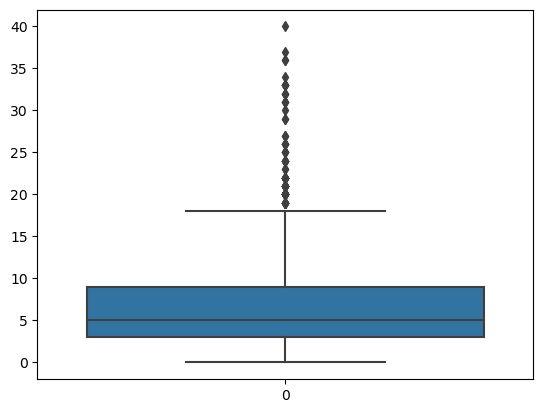

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(df["YearsAtCompany"])
plt.show()



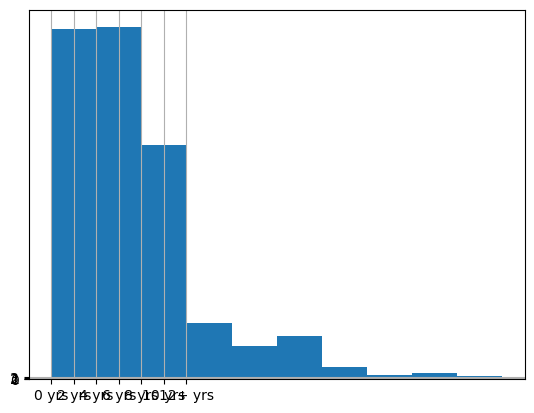

In [78]:
df["YearsAtCompany"].hist()
plt.xticks(ticks=[0, 2, 4, 6, 8, 10, 12], labels=['0 yrs', '2 yrs', '4 yrs', '6 yrs', '8 yrs', '10 yrs', '12+ yrs'])
plt.yticks(ticks=[0, 1, 2, 3])
plt.show()

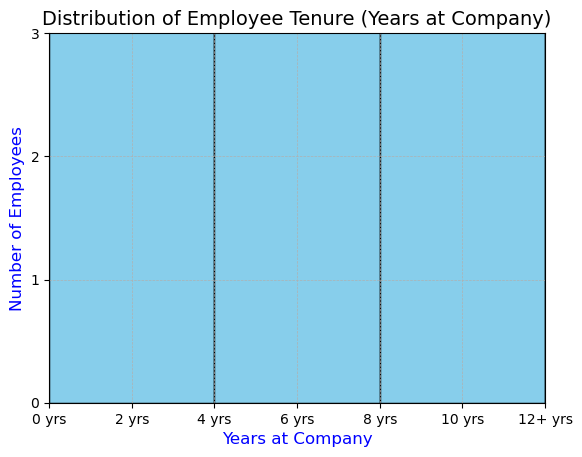

In [89]:
import matplotlib.pyplot as plt

# Plotting histogram with customizations
df["YearsAtCompany"].hist(color='skyblue', edgecolor='black')

# Customizing the x and y labels
plt.xlabel("Years at Company", fontsize=12, color='blue')
plt.ylabel("Number of Employees", fontsize=12, color='blue')

# Setting custom x and y limits
plt.xlim(0, 12)  # Set the x-axis range
plt.ylim(0, 3)   # Set the y-axis range

# Adding gridlines
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# Setting custom tick marks on the x-axis and y-axis
plt.xticks(ticks=[0, 2, 4, 6, 8, 10, 12], labels=['0 yrs', '2 yrs', '4 yrs', '6 yrs', '8 yrs', '10 yrs', '12+ yrs'])
plt.yticks(ticks=[0, 1, 2, 3])

# Adding a title
plt.title("Distribution of Employee Tenure (Years at Company)", fontsize=14)

# Show the plot
plt.show()

In [90]:
from sklearn.preprocessing import LabelEncoder


In [91]:
Attrition=LabelEncoder()

In [92]:

df['Attrition']=Attrition.fit_transform(df['Attrition'])
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [93]:
BusinessTravel=LabelEncoder()

In [94]:

df['BusinessTravel']=BusinessTravel.fit_transform(df['BusinessTravel'])
df['BusinessTravel']

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int64

In [95]:
Department=LabelEncoder()

In [96]:

df['Department']=Department.fit_transform(df['Department'])
df['Department']

0       2
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    2
1469    1
Name: Department, Length: 1470, dtype: int64

In [97]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,1,2,1102,2,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [99]:
df1= df[['Attrition', 'BusinessTravel', 'Department','DistanceFromHome', 'PercentSalaryHike', 'YearsAtCompany']]

In [100]:
df1

,Attrition,BusinessTravel,Department,DistanceFromHome,PercentSalaryHike,YearsAtCompany
0,1,2,2,1,11,6
1,0,1,1,8,23,10
2,1,2,1,2,15,0
3,0,1,1,3,11,8
4,0,2,1,2,12,2
...,...,...,...,...,...,...
1465,0,1,1,23,17,5
1466,0,2,1,6,15,7
1467,0,2,1,4,20,6
1468,0,1,2,2,14,9


In [101]:
y=df1['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [102]:
X = df1.drop('Attrition', axis = 1)

In [103]:
X

,BusinessTravel,Department,DistanceFromHome,PercentSalaryHike,YearsAtCompany
0,2,2,1,11,6
1,1,1,8,23,10
2,2,1,2,15,0
3,1,1,3,11,8
4,2,1,2,12,2
...,...,...,...,...,...
1465,1,1,23,17,5
1466,2,1,6,15,7
1467,2,1,4,20,6
1468,1,2,2,14,9


In [104]:
y=df1['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [105]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=0)

In [106]:
X_train

,BusinessTravel,Department,DistanceFromHome,PercentSalaryHike,YearsAtCompany
181,2,1,27,15,3
1184,2,1,22,25,10
1121,2,2,1,13,1
1031,2,2,9,11,7
521,1,2,3,20,6
...,...,...,...,...,...
763,2,2,10,19,1
835,2,0,8,17,5
1216,2,2,2,17,10
559,2,1,2,13,1


In [107]:
y_train

181     0
1184    0
1121    0
1031    1
521     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 735, dtype: int64

In [108]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [109]:
X_train

array([[ 0.5915255 , -0.47158129,  2.21567381, -0.09803447, -0.63262605],
       [ 0.5915255 , -0.47158129,  1.59585184,  2.60066717,  0.52568748],
       [ 0.5915255 ,  1.4434035 , -1.00740045, -0.6377748 , -0.96357277],
       ...,
       [ 0.5915255 ,  1.4434035 , -0.88343605,  0.44170586,  0.52568748],
       [ 0.5915255 , -0.47158129, -0.88343605, -0.6377748 , -0.96357277],
       [ 0.5915255 ,  1.4434035 ,  0.1082791 , -0.90764496, -0.96357277]])

In [110]:
y_train

181     0
1184    0
1121    0
1031    1
521     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 735, dtype: int64

# logistic regression

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
lg=LogisticRegression()

In [115]:
lg

LogisticRegression()

In [116]:
lg.fit(X_train,y_train)

LogisticRegression()

### Model Result with train data



In [117]:
lg.score(X_train,y_train)

0.8299319727891157

In [118]:
X_test = scaler.fit_transform(X_test)

In [119]:
X_test

array([[-2.50379322,  1.36159142,  0.09108539, -0.29288704,  0.45278091],
       [ 0.58912782, -0.51602527,  1.93368442, -0.57029938, -0.35379681],
       [-0.9573327 ,  1.36159142,  1.07380487,  0.81676231, -0.51511236],
       ...,
       [ 0.58912782, -0.51602527,  0.4596052 ,  0.81676231, -1.16037453],
       [-2.50379322, -0.51602527, -0.27743441, -0.29288704, -0.35379681],
       [ 0.58912782,  1.36159142,  0.828125  ,  1.92641167,  1.58198971]])

In [120]:
lg.score(X_test,y_test)

0.8476190476190476

# predict- test the model with test data

# fit-training the model with train data


In [121]:
#prediction

In [122]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
982     0
62      0
1287    0
193     0
235     0
Name: Attrition, Length: 735, dtype: int64

In [123]:
#lg.predict(X_train[-1,1])

In [124]:
# Predict the target variable for the new data
predictions = lg.predict(X_test)

# Display the predictions
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Attrition          1470 non-null   int64
 1   BusinessTravel     1470 non-null   int64
 2   Department         1470 non-null   int64
 3   DistanceFromHome   1470 non-null   int64
 4   PercentSalaryHike  1470 non-null   int64
 5   YearsAtCompany     1470 non-null   int64
dtypes: int64(6)
memory usage: 69.0 KB


In [3]:
# y_pred = lg.predict(X_test)
import numpy as np
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

NameError: name 'y_pred' is not defined

In [127]:
lg.predict_proba(X_test)

array([[0.80255466, 0.19744534],
       [0.80617267, 0.19382733],
       [0.75431345, 0.24568655],
       ...,
       [0.79492811, 0.20507189],
       [0.81302422, 0.18697578],
       [0.90241764, 0.09758236]])

In [1]:
# specific_data_scaled = scaler.transform(X_test.reshape(1, -1))

In [129]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735



C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.76%


In [132]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       112

    accuracy                           0.85       735
   macro avg       0.42      0.50      0.46       735
weighted avg       0.72      0.85      0.78       735



C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [133]:
specific_data_scaled = scaler.transform(X_test.reshape(1, -1))

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 3675 features, but StandardScaler is expecting 5 features as input.

In [134]:
 lg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [135]:
from sklearn import preprocessing

In [136]:
normalized_arr = preprocessing.normalize([X_test])
print(normalized_arr)

ValueError: Found array with dim 3. the normalize function expected <= 2.

In [137]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,1,2,1102,2,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Seniors


In [138]:
np.array(X_test)

array([[-2.50379322,  1.36159142,  0.09108539, -0.29288704,  0.45278091],
       [ 0.58912782, -0.51602527,  1.93368442, -0.57029938, -0.35379681],
       [-0.9573327 ,  1.36159142,  1.07380487,  0.81676231, -0.51511236],
       ...,
       [ 0.58912782, -0.51602527,  0.4596052 ,  0.81676231, -1.16037453],
       [-2.50379322, -0.51602527, -0.27743441, -0.29288704, -0.35379681],
       [ 0.58912782,  1.36159142,  0.828125  ,  1.92641167,  1.58198971]])

In [139]:
 lg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [140]:
lg.score(X_test, y_test)

0.8476190476190476

In [141]:
predictions = lg.predict(X_test)

In [142]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [143]:
# Add print statements for debugging
print("X_test:", X_test)


X_test: [[-2.50379322  1.36159142  0.09108539 -0.29288704  0.45278091]
 [ 0.58912782 -0.51602527  1.93368442 -0.57029938 -0.35379681]
 [-0.9573327   1.36159142  1.07380487  0.81676231 -0.51511236]
 ...
 [ 0.58912782 -0.51602527  0.4596052   0.81676231 -1.16037453]
 [-2.50379322 -0.51602527 -0.27743441 -0.29288704 -0.35379681]
 [ 0.58912782  1.36159142  0.828125    1.92641167  1.58198971]]


In [144]:
predictions = lg.predict(X_test)


In [145]:
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

In [146]:
y_scores = lg.predict_proba(X_test)[:, 1]

In [147]:
y_scores

array([0.19744534, 0.19382733, 0.24568655, 0.10951682, 0.19399292,
       0.1823188 , 0.11470962, 0.17120161, 0.12253793, 0.15652309,
       0.07442319, 0.19087004, 0.13963432, 0.14315235, 0.14643976,
       0.1481768 , 0.14841422, 0.15652601, 0.15804765, 0.1553782 ,
       0.15752332, 0.08691641, 0.14097132, 0.26605642, 0.2595506 ,
       0.15578818, 0.15092625, 0.17157561, 0.27433125, 0.2626633 ,
       0.1004123 , 0.07384593, 0.24085516, 0.12276806, 0.18237888,
       0.10640635, 0.11793285, 0.17522099, 0.17314199, 0.2148014 ,
       0.05872107, 0.17955344, 0.08177053, 0.12220311, 0.10637583,
       0.18244114, 0.19623143, 0.13890644, 0.18101028, 0.17610346,
       0.21940616, 0.2133211 , 0.21195092, 0.18923191, 0.17888141,
       0.1524948 , 0.18564593, 0.25096061, 0.12292852, 0.29007282,
       0.09168271, 0.28560806, 0.06917709, 0.13485367, 0.23339897,
       0.20267821, 0.14432382, 0.10636173, 0.1388949 , 0.14017795,
       0.07259993, 0.18993405, 0.14802721, 0.17681356, 0.26585

In [148]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [149]:
thresholds

array([1.34259569, 0.34259569, 0.32457998, 0.32347887, 0.3138944 ,
       0.30946963, 0.3069551 , 0.30422446, 0.29867198, 0.29788811,
       0.29132483, 0.29007282, 0.28974737, 0.28550165, 0.28450141,
       0.2808124 , 0.27920774, 0.27773457, 0.27721258, 0.276751  ,
       0.27554169, 0.27084224, 0.26964912, 0.26942004, 0.2691998 ,
       0.26585243, 0.26568521, 0.26451087, 0.2626633 , 0.26259537,
       0.26213493, 0.25768682, 0.25738816, 0.2567306 , 0.25420309,
       0.25096061, 0.24917562, 0.24598107, 0.24541974, 0.24400934,
       0.24289098, 0.24085516, 0.24057347, 0.24056943, 0.23705068,
       0.23627673, 0.23064269, 0.23015944, 0.22967744, 0.22860881,
       0.22855141, 0.22687365, 0.22612695, 0.22606999, 0.22526914,
       0.22520847, 0.223754  , 0.22340828, 0.22327715, 0.21791936,
       0.21751492, 0.21665921, 0.21634035, 0.21448826, 0.21395474,
       0.21379579, 0.2133211 , 0.21230465, 0.21225838, 0.21071726,
       0.21067124, 0.21028823, 0.2102838 , 0.20956881, 0.20914

In [150]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
roc_auc = auc(fpr, tpr)

In [151]:
roc_auc

0.6440824925475809

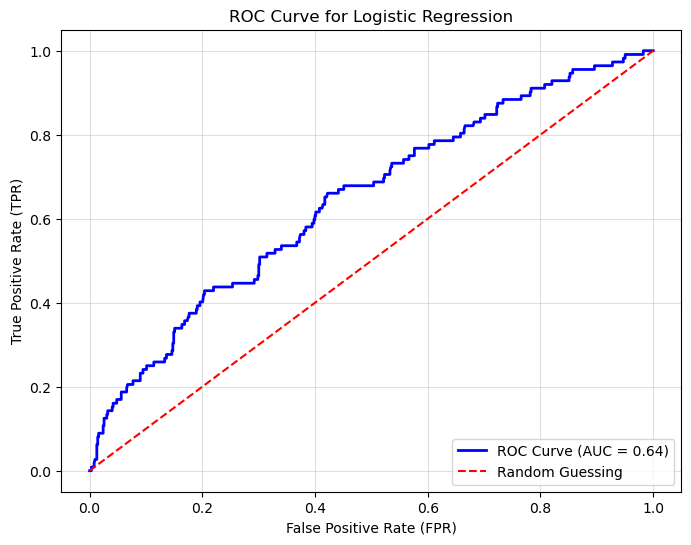

In [201]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()

In [161]:
text = "Ayush Shajin !# "
result = text.strip("#")
print(result)  # Output: "Hello, World!"


Ayush Shajin !# 


In [156]:
text = "  Hello, World! "
result = text.strip( )
print(result)  # Output: "Hello, World!"


Hello, World!


In [174]:
text = "abcabHello, World!abca"
result = text.strip("abc")
print(result)  # Output: "Hello, World!"


Hello, World!


## SVM

In [137]:
svm_classifier_vis = SVC(kernel='linear')
svm_classifier_vis.fit(X_vis, y_train)

plot_decision_boundary(X_vis, y_train, svm_classifier_vis)

NameError: name 'SVC' is not defined

In [138]:
from sklearn.svm import SVC


In [139]:
classifier = SVC(kernel ='rbf', random_state = 0)
 # training set in x, y axis
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [140]:
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.99%


In [141]:
classifier.score(X_train,y_train)

0.8299319727891157

In [142]:
classifier.score(X_test,y_test)

0.8462585034013606

In [143]:
classifier = SVC(kernel ='linear', random_state = 0)
 # training set in x, y axis
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [144]:
classifier.score(X_train,y_train)

0.8299319727891157

In [145]:
classifier.score(X_test,y_test)

0.8476190476190476

## Decision tree

In [146]:
clf_entropy= DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3, min_samples_leaf=4)

In [147]:
# clf_entropy = DecisionTreeClassifier(criterion='entropy', 
#                                      random_state=100, 
#                                      max_depth=3, 
#                                      min_samples_leaf=4, 
#                                      ccp_alpha=0.0001) 
#  comment all lines togther ctr+/
# comment size: esc+ 1/2/3/4

In [148]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=100)

In [149]:
clf_entropy.score(X_train,y_train)

0.8489795918367347

In [150]:
clf_entropy.score(X_test,y_test)

0.8448979591836735

In [151]:
y_pred__ = clf_entropy.predict(X_test)
y_pred__

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [152]:
accuracy_decision_tree = accuracy_score(y_test, y_pred__)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 82.99%


In [153]:
print("\nClassification Report:\n", classification_report(y_test, y_pred__))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       623
           1       0.44      0.07      0.12       112

    accuracy                           0.84       735
   macro avg       0.65      0.53      0.52       735
weighted avg       0.79      0.84      0.79       735



In [176]:
from scipy.stats import shapiro

In [180]:
stat, p_value = shapiro(df['PercentSalaryHike'])
print(f'Shapiro Test for Normality: p-value = {p_value}')

Shapiro Test for Normality: p-value = 7.462415801844913e-30


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   int64 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int64 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                